In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import scipy
import scipy.stats
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli, shapiro, normaltest
from statsmodels.stats import weightstats as wmtests

#seaborn config
#sns.set(color_codes=True)
#sns.set(rc={'figure.figsize': (5,5)})

In [2]:
df = pd.read_csv('nyc_rolling_sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
df.shape

(84548, 22)

In [5]:
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [6]:
#hapus kolom Unnamed dan easement
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)

In [7]:
df.shape

(84548, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
df.tail(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84538,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,B2,178 DARNELL LANE,,10309,2,0,2,3215,1300,1995,1,B2,-,2017-06-30 00:00:00
84539,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,B2,137 DARNELL LANE,,10309,2,0,2,3016,1300,1995,1,B2,-,2016-12-30 00:00:00
84540,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,,10309,2,0,2,3325,1300,1995,1,B2,509000,2016-10-31 00:00:00
84541,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,,10309,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,B9,41 SONIA COURT,,10309,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [11]:
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [12]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [13]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [14]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [15]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [16]:
df.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [17]:
print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [18]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


In [22]:
df.shape

(83783, 20)

In [23]:
df.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  int64         
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  category      
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [32]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26049
GROSS SQUARE FEET                 26049
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [24]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


In [44]:
df[df['RESIDENTIAL UNITS']>0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,59237.000000,4.823100e+04,4.823100e+04,59237.000000,4.875200e+04
mean,3.188767,4610.712342,414.339788,10903.841552,2.828705,0.069433,2.897277,3.156000e+03,3.287738e+03,1837.171987,1.130316e+06
std,1.219989,3686.816317,687.593893,603.316848,19.645674,0.460570,19.832720,2.814200e+04,2.982401e+04,456.570222,4.535920e+06
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,1490.000000,26.000000,10312.000000,1.000000,0.000000,1.000000,1.850000e+03,1.248000e+03,1920.000000,2.900000e+05
50%,3.000000,3937.000000,56.000000,11214.000000,1.000000,0.000000,1.000000,2.422000e+03,1.800000e+03,1935.000000,5.800000e+05
75%,4.000000,6713.000000,1009.000000,11360.000000,2.000000,0.000000,2.000000,3.500000e+03,2.600000e+03,1979.000000,9.800000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,25.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


### Findings:

- 75% of properties have no COMMERCIAL UNITS
- At least 50% of all properties have only 1 TOTAL UNIT
- 1844 RESIDENTIAL and 25 COMMERCIAL UNITS looks like an outlier
- There are properties have 0 SQUARE FEET, which shouldn't be possible unless they don't exist yet or the data is wrong
- Some properties have a SALE PRICE of 0, which is not actually a sale just like the description in template

In [58]:
df['BOROUGH'].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

In [69]:
#coba-coba
df.groupby(['BOROUGH'])['RESIDENTIAL UNITS'].mean()

BOROUGH
1    2.276931
2    3.343580
3    2.011618
4    1.687283
5    1.230111
Name: RESIDENTIAL UNITS, dtype: float64

## Mean, Median, and Mode for Each Borough

In [67]:
df.groupby(['BOROUGH']).mean()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1107.657938,749.190421,9912.565960,2.276931,0.280521,2.597227,5646.945628,32622.997758,1706.536902,3.344642e+06
2,4202.934372,298.625679,10360.980841,3.343580,0.160280,3.510152,3909.012725,4489.147412,1750.578067,5.946771e+05
3,4317.583484,339.525228,11072.688210,2.011618,0.145451,2.194229,2016.057333,2481.756365,1767.130185,8.410834e+05
4,6630.747589,230.493672,11300.423572,1.687283,0.190410,1.908920,4265.245190,3345.841693,1852.259982,7.388827e+05
5,3261.786162,198.775554,10047.136090,1.230111,0.080400,1.313163,8339.843259,4709.373037,1869.968177,5.436113e+05


In [68]:
df.groupby(['BOROUGH']).median()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1170.0,1004.0,10022.0,0.0,0.0,1.0,2498.0,7520.0,1937.0,1155000.0
2,4177.5,47.0,10465.0,1.0,0.0,1.0,2375.0,1764.0,1932.0,274897.0
3,4558.0,50.0,11219.0,1.0,0.0,1.0,1800.0,1520.0,1930.0,425605.0
4,5900.0,40.0,11375.0,1.0,0.0,1.0,2768.0,1728.0,1945.0,495000.0
5,3024.0,56.0,10308.0,1.0,0.0,1.0,3700.0,1632.0,1973.0,465000.0


In [101]:
df.groupby(['BOROUGH']).apply(lambda x: x.mode())

,,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,,,,,,,,
1,0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,2523.0,112850.0,0,2,R4,10.0,2017-08-07
2,0,2,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.0,0.0,0,1,D4,0.0,2017-06-29
3,0,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.0,0.0,0,1,R4,0.0,2016-10-06
4,0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,4000.0,2000.0,1920,1,A1,10.0,2016-11-10
5,0,5,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,4000.0,1200.0,1970,1,A5,10.0,2017-03-01


In [94]:
#coba-coba
df.mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,,10314,1,0,1,0.0,0.0,0,1,R4,0.0,2017-06-29


In [96]:
#coba-coba
df.apply(lambda x: x.mode())

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,,10314,1,0,1,0.0,0.0,0,1,R4,0.0,2017-06-29


## Box Plot Bronx Price Data

In [110]:
bronx_data = df.loc[df['BOROUGH'] == 2]
bronx_data.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18306,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,A1,4455 PARK AVENUE,,10457,1,0,1,1622.0,1587.0,1899,1,A1,140000.0,2017-05-12
18307,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,A1,4348 PARK AVENUE,,10457,1,0,1,3525.0,1764.0,1899,1,A1,420000.0,2017-02-03
18308,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,A1,1948 BATHGATE AVENUE,,10457,1,0,1,2356.0,2047.0,1901,1,A1,127000.0,2017-08-22
18309,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,A1,2047 BATHGATE AVENUE,,10457,1,0,1,2329.0,1431.0,1901,1,A1,273796.0,2016-09-21
18310,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,A1,2047 BATHGATE AVENUE,,10457,1,0,1,2329.0,1431.0,1901,1,A1,231244.0,2016-09-21
18311,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,27,A1,538 EAST 182 STREET,,10457,1,0,1,1209.0,1048.0,1901,1,A1,0.0,2016-09-20
18312,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,28,A1,540 EAST 182 STREET,,10457,1,0,1,1209.0,1048.0,1901,1,A1,290000.0,2016-09-27
18313,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,105,A1,2323 BASSFORD AVENUE,,10458,1,0,1,922.0,1248.0,1901,1,A1,0.0,2017-03-16
18314,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,151,B1,519 EAST 171 STREET,,10457,2,0,2,2000.0,2400.0,1993,1,B1,0.0,2016-10-24
18315,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,128,B1,559 CLAREMONT PARKWAY,,10457,2,0,2,2361.0,2394.0,1995,1,B1,0.0,2017-05-04


In [111]:
bronx_price = bronx_data[['SALE PRICE']]
bronx_price

,SALE PRICE
18306,140000.0
18307,420000.0
18308,127000.0
18309,273796.0
18310,231244.0
...,...
25350,205000.0
25351,117000.0
25352,1085250.0
25353,0.0


In [112]:
bronx_price.dropna(axis=0,inplace=True)
bronx_price

<ipython-input-112-36d12157321b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_price.dropna(axis=0,inplace=True)


,SALE PRICE
18306,140000.0
18307,420000.0
18308,127000.0
18309,273796.0
18310,231244.0
...,...
25350,205000.0
25351,117000.0
25352,1085250.0
25353,0.0


In [114]:
bronx_price_array = np.array(bronx_price)
bronx_price_array

array([[ 140000.],
       [ 420000.],
       [ 127000.],
       ...,
       [1085250.],
       [      0.],
       [1414750.]])

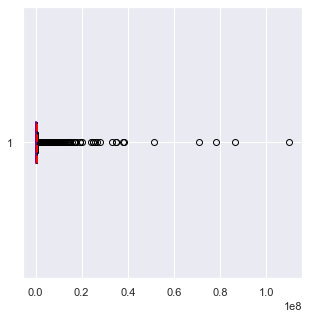

In [124]:
fig, bx = plt.subplots()
bx.boxplot(bronx_price_array, vert=False, showmeans=True, meanline=True, labels=None, patch_artist=True,
           medianprops= {'linewidth':2, 'color':'purple'}, meanprops={'linewidth':2, 'color':'red'})
plt.show()

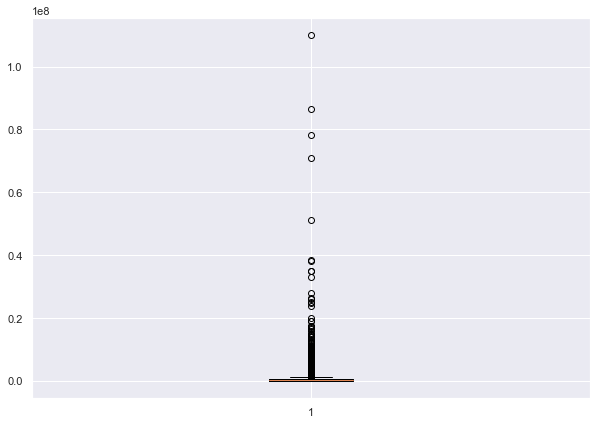

In [125]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(bronx_price_array) 
plt.show() 

## Z-score Calculation

In [127]:
scipy.stats.zscore(bronx_price_array)

array([[-0.16277364],
       [-0.06253411],
       [-0.16742761],
       ...,
       [ 0.17562426],
       [-0.2128934 ],
       [ 0.2935847 ]])

## Probability Mass Function Plot

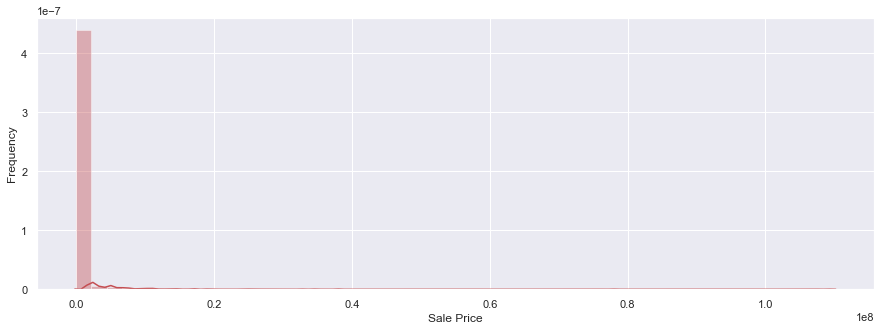

In [145]:
plt.figure(figsize=(15,5))

sns.distplot(bronx_price_array, kde=True, color='r')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

## Confidence Interval

In [159]:
bronx_price_array.mean(), bronx_price_array.std(), bronx_price_array.size

(594677.118387189, 2793309.3338986184, 6994)

In [152]:
df.groupby('BOROUGH').agg({'SALE PRICE': [np.mean, np.std, np.size]})

SALE PRICE                       
                 mean           std     size
BOROUGH                                     
1        3.344642e+06  2.414048e+07  18102.0
2        5.946771e+05  2.793509e+06   6994.0
3        8.410834e+05  3.951912e+06  23843.0
4        7.388827e+05  3.227420e+06  26548.0
5        5.436113e+05  1.905544e+06   8296.0

In [160]:
mean_bronx_sale_price = 594677.118387189
std_bronx_sale_price = 2793309.3338986184
n_bronx = 6994
z=1.96

stderr_mean_bronx = std_bronx_sale_price / np.sqrt(n_bronx)
print('standard error of mean:', stderr_mean_bronx)


standard error of mean: 33400.749981830464


In [162]:
def compute_confint(estimate, stderr, z_score=1.96):
    return(
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [163]:
lower_ci, upper_ci = compute_confint(estimate=mean_bronx_sale_price, stderr=stderr_mean_bronx)

print('CI of mean estimate:[{}, {}]'.format(lower_ci, upper_ci))

CI of mean estimate:[529211.6484228013, 660142.5883515767]


## Statistical Hypothesis Test

In [167]:
stat, p = shapiro(bronx_price_array)
print('stat= %.3f, p= %.3f' %(stat,p))
if p>0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

stat= 0.135, p= 0.000
Probably NOT Gaussian


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [169]:
stat, p = normaltest(bronx_price_array)
print('stat= %.3f, p= %.3f' %(stat,p))
if p>0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

stat= 15933.166, p= 0.000
Probably NOT Gaussian


### Based on Shapiro-Wilk and D'Agostino K^2 Test, the sale price in Bronx doesn't have Gaussian/Normal Distribution as proved by the probability mass function plot above 

### Null hypothesis: Sale price mean value in Bronx is around 600,000

In [195]:
ztest, pval = wmtests.ztest(bronx_price_array, x2=None, value=600000)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.8733909701225353
accept null hypothesis


### Final conclusion: Sale price mean value in Bronx is 594,677 to be precise. So our initial hypothesis is correct!